### Dataset available publicly at https://www.kaggle.com/c/digit-recognizer
#### The accuracy obtained on the test set was over 99% on Kaggle

In [1]:
# Importing the libraries to be used:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from tensorflow import keras

In [2]:
# Reading the files into Dataframes

X = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
Y = X["label"]
X = X.drop("label", axis=1)

test_data  = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print ("The train data has", X.shape[0], "examples. Each of them contains intensity values for", X.shape[1],"pixels.")
print ("The test  data has", test_data.shape[0], "examples. Each of them contains intensity values for", test_data.shape[1],"pixels.")

The train data has 42000 examples. Each of them contains intensity values for 784 pixels.
The test  data has 28000 examples. Each of them contains intensity values for 784 pixels.


In [3]:
# Converts the labels from 0-to-10 numbers to one hot vectors:

from keras.utils import to_categorical
Y = to_categorical(Y)

# Out of 42000 train examples, 5000 will be allocated to validation set
cuttingNumber = 37000

Using TensorFlow backend.


In [4]:
# The pixels' intensity values are normalised into [0,1] range, and train and validation sets are saved into memory

X         = np.array(X)/255.0
Y         = np.array(Y)
test_data = np.array(test_data)/255.0

train_data = X[:cuttingNumber]
Y_train    = Y[:cuttingNumber]
val_data   = X[cuttingNumber:]
Y_val      = Y[cuttingNumber:]

# The data is reshaped into images of width 28 and height 28. The last "1" denotes  grey-scale images have only 1 color channel:

train_data = train_data.reshape((-1,28,28,1))
val_data   = val_data.reshape((-1,28,28,1))
test_data  = test_data.reshape((-1,28,28,1))
X = X.reshape((-1,28,28,1))


In [5]:
print ("The shape of the training data is:                ", train_data.shape)
print ("The shape of the validation data is:              ",val_data.shape)
print ("The shape of the test data is:                    ",test_data.shape)
print ("The shape of the labels of the training data is:  ",Y_train.shape)
print ("The shape of the labels of the validation data is:",Y_val.shape)

The shape of the training data is:                 (37000, 28, 28, 1)
The shape of the validation data is:               (5000, 28, 28, 1)
The shape of the test data is:                     (28000, 28, 28, 1)
The shape of the labels of the training data is:   (37000, 10)
The shape of the labels of the validation data is: (5000, 10)


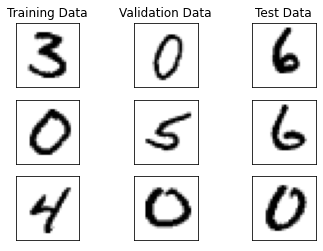

In [6]:
# Plots some random examples of training, validation and test data:

randomIndexes = [randint(0,5000) for i in range(3)]
fig, axs = plt.subplots(3,3,sharex="all", sharey="all")
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])
for i, j in enumerate(randomIndexes):
    if (i==0):
        axs[i][0].title.set_text("Training Data")
        axs[i][1].title.set_text("Validation Data")
        axs[i][2].title.set_text("Test Data")
    axs[i][0].imshow(np.squeeze(train_data[j],axis=-1), cmap="binary")
    axs[i][1].imshow(np.squeeze(val_data[j],axis=-1), cmap="binary")
    axs[i][2].imshow(np.squeeze(test_data[j],axis=-1), cmap="binary")


## The model used was a Convolutional Neural Network.
### It was first trained on the training data and evaluated with the validation data. After getting a high score, the same model architecture was trained instead on both Train and Val; and the test predictions were submitted to Kaggle to receive the final Score.

### In order not to overfit the training data, Dropout layers and Data Augmentation techniques were employed

In [7]:
#iterator = keras.preprocessing.image.ImageDataGenerator(rotation_range=10,width_shift_range=0.1
             # ,height_shift_range=0.1,zoom_range=0.05,shear_range=5.0).flow(train_data,Y_train)
iterator = keras.preprocessing.image.ImageDataGenerator(rotation_range=10,width_shift_range=0.1
              ,height_shift_range=0.1,zoom_range=0.05,shear_range=5.0).flow(X,Y)
model = keras.Sequential()
model.add(keras.layers.Conv2D(input_shape=(28,28,1),filters = 32, kernel_size=(2,2), padding="valid"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(filters = 64, kernel_size=(2,2),padding="valid"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(filters = 128, kernel_size=(3,3),padding="valid"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(units=64,activation = "relu"))
model.add(keras.layers.Dense(units=10, activation = "softmax"))
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()
#model.fit_generator (iterator, epochs=30, validation_data = (val_data,Y_val))
model.fit_generator (iterator, epochs=30,verbose=2)
#model.evaluate(val_data, Y_val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         7

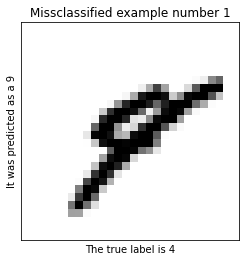

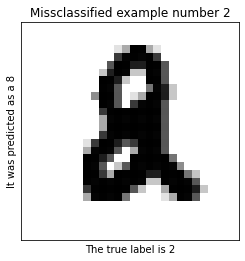

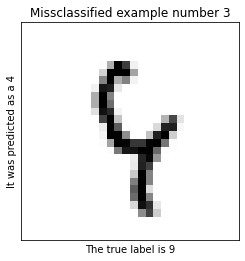

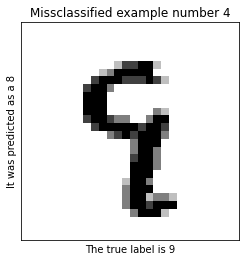

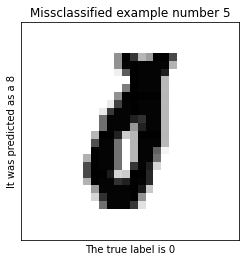

In [8]:
# Finally, some missclassified examples are shown here in order to get a better understanding of how well our model is doing:

Y_true = np.argmax(Y,axis=1)
Y_pred = np.argmax(model.predict(X),axis=1)

missClassified = [i for i in range(Y_true.shape[0]) if Y_true[i]!=Y_pred[i]]

examples = np.random.choice (missClassified, size = 5, replace = False)

for ex, i in enumerate(examples):
    plt.imshow(np.squeeze(X[i],axis=-1), cmap="binary")
    plt.xlabel("The true label is " + str(Y_true[i]))
    plt.ylabel("It was predicted as a " + str(Y_pred[i]))
    plt.title("Missclassified example number " + str(ex+1))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [9]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions, axis=1)
IdRange     = np.arange(1, predictions.shape[0]+1)
output = pd.DataFrame({'ImageId':IdRange,'Label':predictions})
output.to_csv("my_submission.csv", index=False)
print ("Your submission was succesfully saved!")

Your submission was succesfully saved!
